In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('US_Population_Workforce_1900_2000.csv')
df

,Age,Male 1900,Female 1900,Male 2000,Female 2000
0,0,4600,4600,9750,9300
1,5,4500,4400,10550,10050
2,10,4100,4000,10550,10000
3,15,3800,3800,10250,9700
4,20,3700,3750,9750,9300
5,25,3400,3250,9650,9000
6,30,2900,2650,10200,10100
7,35,2600,2350,11500,11650
8,40,2300,2000,11300,11150
9,45,1900,1650,9950,10250


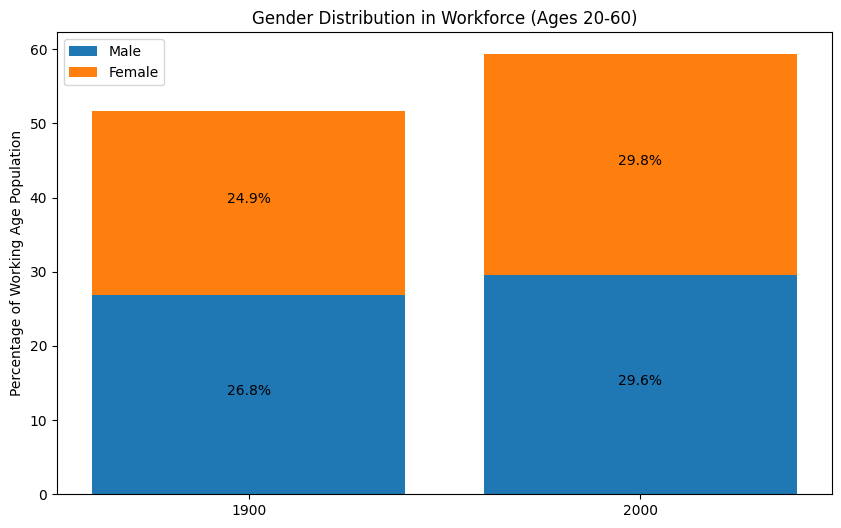

In [6]:
# Filter for working age (20-60)
working_age = df[(df['Age'] >= 20) & (df['Age'] <= 60)]

# Calculate total population for each year
total_1900 = df['Male 1900'].sum() + df['Female 1900'].sum()
total_2000 = df['Male 2000'].sum() + df['Female 2000'].sum()

# Calculate percentages
male_1900_pct = working_age['Male 1900'].sum() / total_1900 * 100
female_1900_pct = working_age['Female 1900'].sum() / total_1900 * 100
male_2000_pct = working_age['Male 2000'].sum() / total_2000 * 100
female_2000_pct = working_age['Female 2000'].sum() / total_2000 * 100

# Create data for plotting
years = ['1900', '2000']
male_pcts = [male_1900_pct, male_2000_pct]
female_pcts = [female_1900_pct, female_2000_pct]

# Create stacked bar plot
plt.figure(figsize=(10, 6))
plt.bar(years, male_pcts, label='Male')
plt.bar(years, female_pcts, bottom=male_pcts, label='Female')

plt.title('Gender Distribution in Workforce (Ages 20-60)')
plt.ylabel('Percentage of Working Age Population')
plt.legend()

# Add percentage labels on the bars
for i in range(len(years)):
    plt.text(i, male_pcts[i]/2, f'{male_pcts[i]:.1f}%', ha='center')
    plt.text(i, male_pcts[i] + female_pcts[i]/2, f'{female_pcts[i]:.1f}%', ha='center')

plt.show()


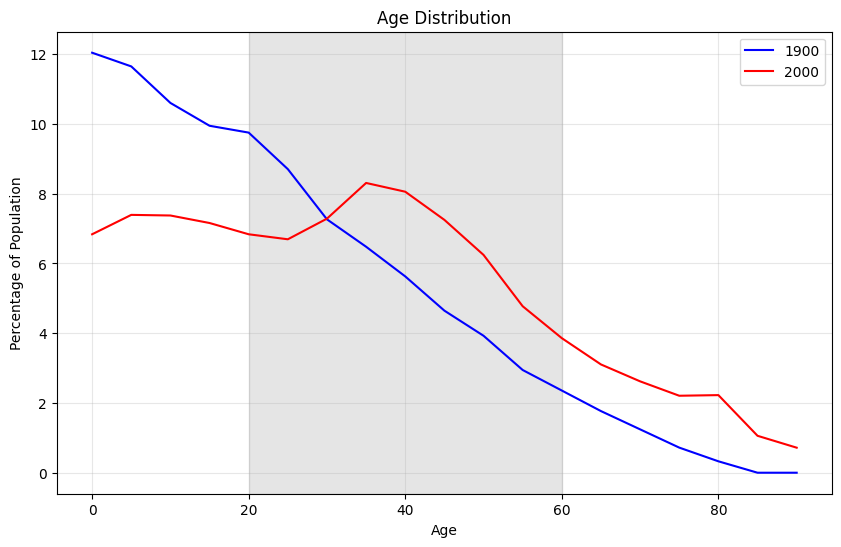

In [8]:
# Calculate percentages for each year
def get_pcts(male_col, female_col):
    total = df[male_col].sum() + df[female_col].sum()
    pcts = (df[male_col] + df[female_col]) / total * 100
    return pcts

pcts_1900 = get_pcts('Male 1900', 'Female 1900')
pcts_2000 = get_pcts('Male 2000', 'Female 2000')

# Create the line plot
plt.figure(figsize=(10, 6))
plt.plot(df['Age'], pcts_1900, label='1900', color='blue')
plt.plot(df['Age'], pcts_2000, label='2000', color='red')

# Shade the working age region (20-60)
plt.axvspan(20, 60, alpha=0.2, color='gray')

plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Percentage of Population')
plt.legend()
plt.grid(True, alpha=0.3)

plt.show()
